# Good Oscillations: Analysis and Physical Implementation of Chua's Circuit

## Background
The Lorenz system is perhaps the first and most well-known chaotic system, with the famous "butterfly" diagram littering the literature on introductions to chaotic systems. This system was first described in the analysis of waves on the surface of a bowl of fluid with the outer edges heated. In fact, the 
    

Chua's Circuit is a well known nonperiodic oscillator, both for its simplicity (can be made with easily obtainable,relatively cheap components) as well as its complex behaviour: Chua's circuit generates a quintessential chaotic system. In the below example, a

![image](files\img\chua_circ.svg.png)
Figure: 1 The basic Chua's circuit

## Equations & Derivation for Chua's Circuit

![image](files\img\circ_act.png)
Figure: 2 

<table style="border: 1px solid #ffffff; width: 100%">
  <tr>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\TEK0007.BMP) A</td>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\TEK0010.BMP) B</td>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\TEK0013.BMP) C</td>
  </tr>
  <tr>
    <td style="border:1px solid #ffffff " colspan="3"> Tables A & B both show the attractor seen in Chua's circuit. C shows the waveform as the system approaches chaotic</td>
  </tr>
</table>

$$
\begin{aligned}
\text{Chua's Circuit Equation}: && \frac{d{x}}{d{t}}=\alpha[y-x-f(x)] && \frac{d{y}}{d{t}}=\frac{x-y+Rz}{RC_2} && \frac{dz}{dt}=-\beta z \\
 \text{with:  } &&f(x)=m_0(x-m_1) \text{ if }  x \leq -E, && m_1 x  \text{ if } -1\leq x\leq 1,&&\text{ else } m_0(x-1)+m_1
\end{aligned}
$$

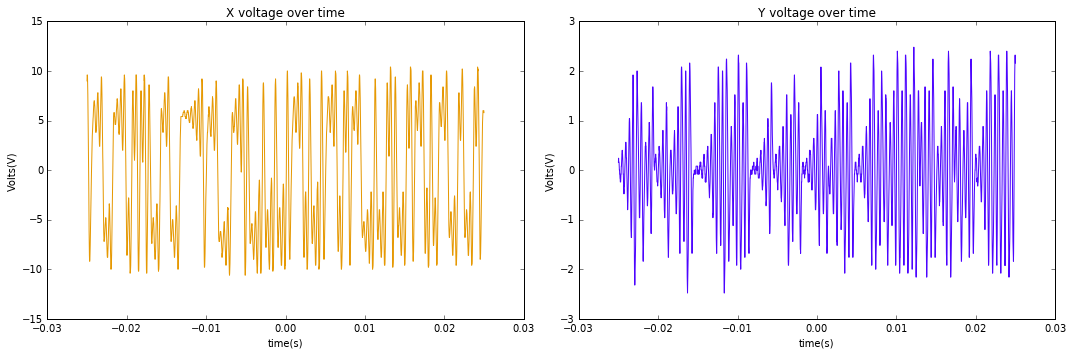

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

#Arrays for data
xcor=[]
ycor=[]

#Import and dissect TDS2014B oscilloscope output

ka=[]
with open('wav/TEK0001.CSV', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        ka.append(row)
for i in range(len(ka)):
    kaw=ka[i]
    xcor.append([float(kaw[3]),float(kaw[4])])

ka2=[]
with open('wav/TEK0000.CSV', 'rt') as csvfile2:
    reader2 = csv.reader(csvfile2, delimiter=',')
    for row in reader2:
        ka2.append(row)
for i in range(len(ka2)):
    kaw2=ka2[i]
    ycor.append([float(kaw2[3]),float(kaw2[4])])
plt.rcParams['figure.figsize']=(15,5)

#Plots!
f, (ax1,ax2) = plt.subplots(1,2)
#ax1.set_axis_bgcolor(204,255,204)
ax1.plot([x for [x,y] in xcor], [y for [x,y] in xcor],color=(.9,.6,.01))
ax2.plot([x for [x,y] in ycor], [y for [x,y] in ycor],color=(.3,.02,1))

#Labels and unimportant bookkeeping bits
ax1.set_xlabel("time(s)")
ax2.set_xlabel("time(s)")
ax1.set_ylabel("Volts(V)")
ax2.set_ylabel("Volts(V)")
ax1.set_title("X voltage over time")
ax2.set_title("Y voltage over time")
f.tight_layout()

In [177]:
from scipy.integrate import odeint as ode
from scipy.integrate import ode as ode2

def f(k):
    m = -1.2
    mm = -.5
    return (k*mm)+0.5*(m-mm)*(abs(k+2)-abs(k-2))

def f(k):
    m = -1.2
    mm = -.6
    
    #if k <= -1:
    #    return m*(x-mm)
    #elif k<1:
    #    return mm*x
    #else:
    #    return m(x-1)+mm

def chua(v,t):
    x = v[0]
    y = v[1]
    z = v[2]
    
    dx = 16.*(y-x-f(x))
    dy = x-y+z
    dz = -28.*y
    
    return [dx,dy,dz]

x0,y0,z0=[-.4,.5,-.1]

t = np.linspace(0,30,100000)

soln=ode(chua,[x0,y0,z0],t)
x=soln[:,0]
plt.plot(t,x)

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

In [6]:

#grid


In [4]:

import wave
import numpy
import struct
import sys
import csv
from scikit.samplerate import resample

def write_wav(data, filename, framerate, amplitude):
    wavfile = wave.open(filename, "w")
    nchannels = 1
    sampwidth = 2
    framerate = framerate
    nframes = len(data)
    comptype = "NONE"
    compname = "not compressed"
    wavfile.setparams((nchannels,
                        sampwidth,
                        framerate,
                        nframes,
                        comptype,
                        compname))
    print("Please be patient whilst the file is written")
    frames = []
    for s in data:
        mul = int(s * amplitude)
        # print "s: %f mul: %d" % (s, mul)
        frames.append(struct.pack('h', mul))
    # frames = (struct.pack('h', int(s*self.amp)) for s in sine_list)
    frames = ''.join(frames)
    for x in xrange(0, 7200):
        wavfile.writeframes(frames)
    wavfile.close()
    print("%s written" %(filename))
    
    
if __name__ == "__main__":
    if len(sys.argv) <= 1:
        print("You must supply a filename to generate")
        exit(-1)
    for fname in sys.argv[1:]:
        data = []
        for time, value in csv.reader(open(fname, 'U'), delimiter=','):
            try:
                data.append(float(value))
            except ValueError:
                pass # Just skip it
        print("Generating wave file from %d samples") % (len(data),)
        arr = numpy.array(data)
        # Normalize data
        arr /= numpy.max(numpy.abs(data))
        filename_head, extension = fname.rsplit(".", 1)
        # Resample normalized data to 44.1 kHz
        target_samplerate = 44100
        sampled = resample(arr, target_samplerate/100000.0, 'sinc_best')
        write_wav(sampled, filename_head + ".wav", 100000, 32700)
    

ImportError: No module named 'scikit'

1.10.1


## Applications

Besides strictly being an example of a chaotic nonlinear system, certain properties of Chua's circuit naturally are sought in some applications

[1] - Irimiciuc, Stefan-Andrei, Ovidiu Vasilovici, and Dan-Gheorghe Dimitriu. "Chua's Circuit: Control and Synchronization." International Journal of Bifurcation and Chaos 25.04 (2015): 1550050.

[2] - Cruz-Hernández, César, and Hazael Serrano-Guerrero. "Cryptosystems based on synchronized Chua’s circuits." Proceedings of the 16th IFAC world congress, Prague, Czech Republic. 2005.

[3] - Jiang, Hui-yan, and Chong Fu. "An image encryption scheme based on Lorenz chaos system." Natural Computation, 2008. ICNC'08. Fourth International Conference on. Vol. 4. IEEE, 2008.

[4] - Marco, Anderson Gonçalves, Alexandre Souto Martinez, and Odemir Martinez Bruno. "Fast, parallel and secure cryptography algorithm using Lorenz's attractor." International Journal of Modern Physics C 21.03 (2010): 365-382.